## Data Modelling

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import scipy.stats as ss
import math
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [ ]:
df = pd.read_csv('df_arr.csv',sep='\t')
df

,temperature,time,expiration,age,education,income,Bar,CoffeeHouse,CarryAway,Restaurant20To50,...,weather_Rainy,weather_Snowy,weather_Sunny,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner
0,1,3,1,1,4,5,0,1,3,1,...,0,0,1,0,1,0,1,0,0,0
1,2,2,0,1,4,5,0,1,3,1,...,0,0,1,0,1,0,0,1,0,0
2,2,2,1,1,4,5,0,1,3,1,...,0,0,1,0,1,0,0,1,0,0
3,2,2,0,1,4,5,0,1,3,1,...,0,0,1,0,1,0,0,1,0,0
4,2,3,1,1,4,5,0,1,3,1,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,1,0,1,1,4,6,0,0,2,2,...,1,0,0,1,0,0,0,0,0,1
12003,1,1,1,1,4,6,0,0,2,2,...,1,0,0,0,0,1,1,0,0,0
12004,0,1,1,1,4,6,0,0,2,2,...,0,1,0,0,0,1,1,0,0,0
12005,0,1,1,1,4,6,0,0,2,2,...,0,1,0,0,0,1,1,0,0,0


In [ ]:
label = df[['Y']] #biar bisa diambil nama columnnya untuk nanti viz decision treenya
labels = np.array(df['Y']) #karna kudu array
feature = df.drop(columns='Y')
list_feature = list(feature.columns)
list_label = list(label.columns)
features = np.array(feature)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state=42)

In [ ]:
def eval(model):
    y_pred = model.predict(X_test)

    from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score,classification_report
    print('accuracy (test): '+ str(accuracy_score(y_test, y_pred)))
    print('---Classification Report---\n'+str(classification_report(y_test, y_pred)))

In [ ]:
from sklearn.naive_bayes import CategoricalNB
gnb = CategoricalNB(random_state=42)
gnb.fit(X_train,y_train)

CategoricalNB()

In [ ]:
eval(gnb)

accuracy (test): 0.6056064390785456
---Classification Report---
              precision    recall  f1-score   support

           0       0.54      0.55      0.54      1535
           1       0.66      0.65      0.65      2068

    accuracy                           0.61      3603
   macro avg       0.60      0.60      0.60      3603
weighted avg       0.61      0.61      0.61      3603



## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, max_depth= 10,random_state=42)
rf.fit(X_train,y_train);

In [ ]:
eval(rf)

accuracy (test): 0.6505689703025257
---Classification Report---
              precision    recall  f1-score   support

           0       0.62      0.46      0.53      1535
           1       0.66      0.79      0.72      2068

    accuracy                           0.65      3603
   macro avg       0.64      0.63      0.63      3603
weighted avg       0.65      0.65      0.64      3603



In [ ]:
rf_new = RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf= 4, max_depth= 5, random_state=42)
rf_new.fit(X_train,y_train);

In [ ]:
eval(rf_new)

accuracy (test): 0.6314182625589786
---Classification Report---
              precision    recall  f1-score   support

           0       0.62      0.34      0.44      1535
           1       0.63      0.85      0.73      2068

    accuracy                           0.63      3603
   macro avg       0.63      0.59      0.58      3603
weighted avg       0.63      0.63      0.60      3603



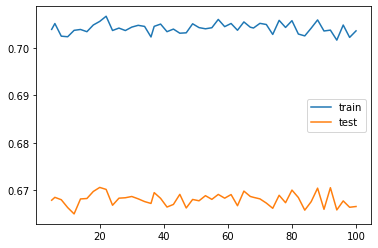

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
values = [int(x) for x in np.linspace(5, 100)] # hyperparameter n_iterations
# solve = ['']
train_score = []
test_score = []

for c in values:
    lr = RandomForestClassifier(n_estimators = 100, max_depth=5, min_samples_split=30)
    lr.fit(X_train, y_train)
    
    # eval test
    y_pred_proba = lr.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, y_pred_proba[:,1])
    test_score.append(auc_test)
    
    # eval test
    y_pred_proba_train = lr.predict_proba(X_train)
    auc_train = roc_auc_score(y_train, y_pred_proba_train[:,1])
    train_score.append(auc_train)

from matplotlib import pyplot as plt
plt.plot(values, train_score, label='train')
plt.plot(values, test_score, label='test')
plt.legend()
plt.show()

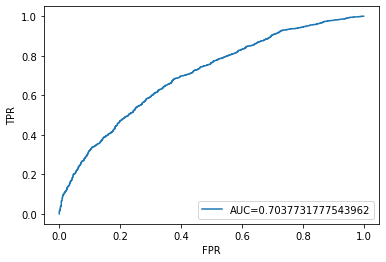

In [ ]:
from sklearn import metrics
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr,tpr,label='AUC='+str(auc))
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(loc=4)
plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier(max_depth=5) # inisiasi object dengan nama dt
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
eval(dt)

accuracy (test): 0.6358590063835693
---Classification Report---
              precision    recall  f1-score   support

           0       0.62      0.38      0.47      1535
           1       0.64      0.83      0.72      2068

    accuracy                           0.64      3603
   macro avg       0.63      0.60      0.60      3603
weighted avg       0.63      0.64      0.62      3603



Text(0.5, 1.0, 'feature importance score')

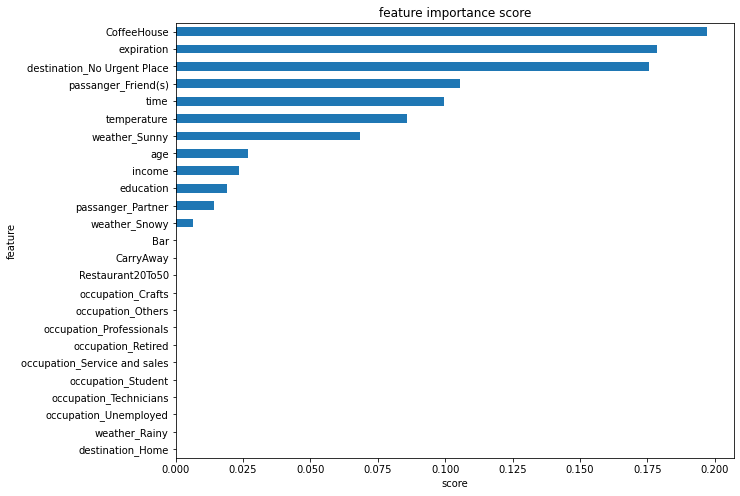

In [ ]:
feat_importances = pd.Series(dt.feature_importances_, index=feature.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

## XGBoost

In [ ]:
xgb = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.5,max_leaf_nodes=5, subsample= 1, random_state=42)
xgb.fit(X_train, y_train)

NameError: ignored

In [ ]:
eval(xgb)

accuracy (test): 0.6588953649736331
---Classification Report---
              precision    recall  f1-score   support

           0       0.60      0.59      0.60      1535
           1       0.70      0.71      0.71      2068

    accuracy                           0.66      3603
   macro avg       0.65      0.65      0.65      3603
weighted avg       0.66      0.66      0.66      3603



In [ ]:
ab = AdaBoostClassifier(n_estimators=1000)
ab.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1000)

In [ ]:
eval(ab)

accuracy (test): 0.6266999722453511
---Classification Report---
              precision    recall  f1-score   support

           0       0.58      0.46      0.51      1535
           1       0.65      0.75      0.70      2068

    accuracy                           0.63      3603
   macro avg       0.61      0.61      0.60      3603
weighted avg       0.62      0.63      0.62      3603



## SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=5,kernel='rbf',degree=5)
svc.fit(X_train, y_train)

SVC(C=5, degree=5)

In [ ]:
eval(svc)

accuracy (test): 0.6422425756314183
---Classification Report---
              precision    recall  f1-score   support

           0       0.60      0.48      0.53      1535
           1       0.66      0.76      0.71      2068

    accuracy                           0.64      3603
   macro avg       0.63      0.62      0.62      3603
weighted avg       0.64      0.64      0.63      3603



## Business Insights

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_cat = pd.read_csv('clean data cat.csv',sep='\t')
df_cat.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
df_cat.columns

Index(['id', 'destination', 'passanger', 'weather', 'temperature', 'time',
       'coupon', 'expiration', 'gender', 'age', 'maritalStatus',
       'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'Y'],
      dtype='object')

In [ ]:
def show_val(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = b.get_height()
        ax.text(x, y, val, ha = 'center')
        
def show_val_percent(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = f'{b.get_height():.2f}%'
        ax.text(x, y, val, ha = 'center')
        
def show_val_int(ax):
    for b in ax.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_y() + b.get_height() + (b.get_height() * 0.01)
        val = int(b.get_height())
        ax.text(x, y, val, ha = 'center')

In [ ]:
def group_df_churn(col):
    ndf = df_cat.groupby([col, 'Y']).agg({'id':'nunique'}).reset_index()
    ndf_sum = ndf.groupby(col).agg({'id':'sum'})
    ndf = ndf.merge(ndf_sum, on = col)
    ndf['percentage'] = (ndf['id_x']/ndf['id_y']) * 100
    return ndf

def plot_box(col):
    df1 = group_df_churn(col)
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.barplot(x = col, y= 'id_x', hue = 'Y', data = df1, ax = ax[0])
    ax[0].set_ylabel('Total Customer')
    show_val_int(ax[0])
    sns.barplot(x = col, y= 'percentage', hue = 'Y', data = df1, ax = ax[1])
    show_val_percent(ax[1])
    plt.title('Distribusi Pemakaian Jenis Kupon Coffee House\nBerdasarkan Frekuensi Kunjungan')
    
def plot_continuous(col):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
    sns.boxplot(x = 'Y', y = col, data = df_cat, ax = ax[0])
    sns.histplot(x = col, hue = 'Y', data = df_cat, ax = ax[1])

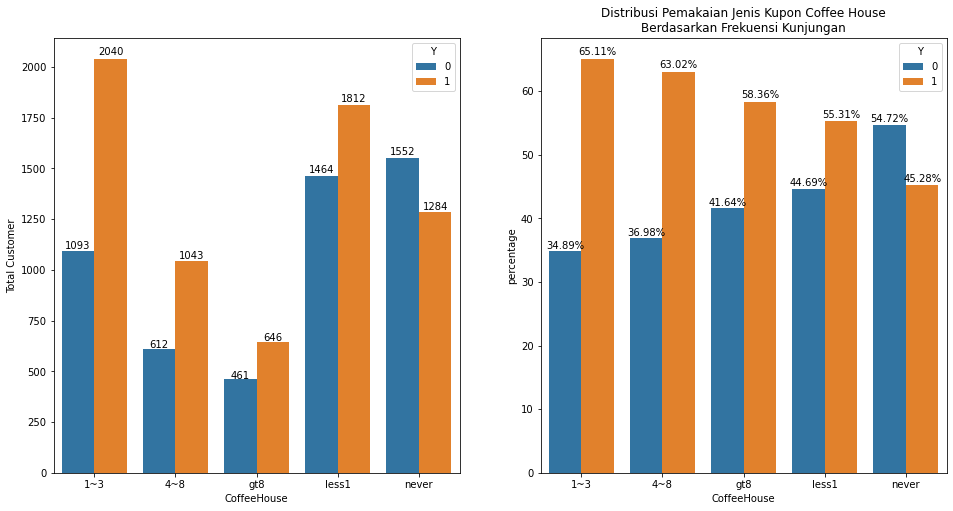

In [ ]:
plot_box('CoffeeHouse')

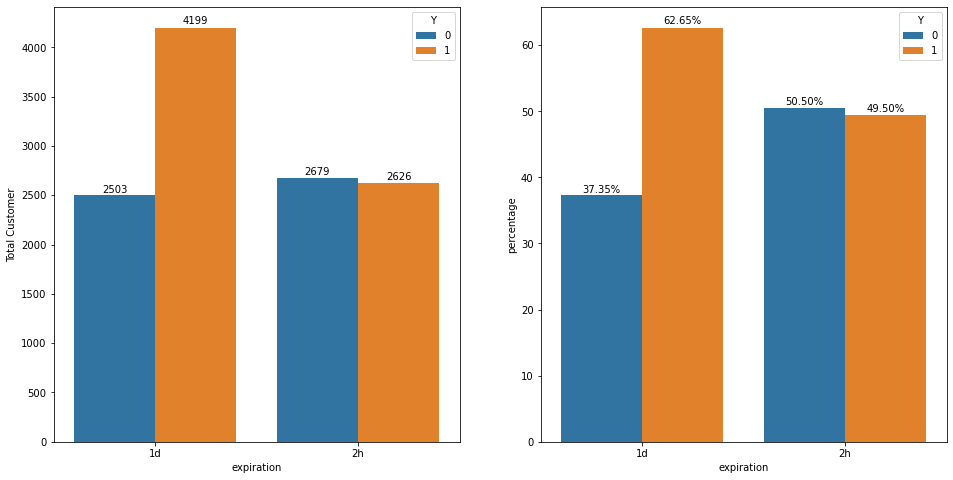

In [ ]:
plot_box('expiration')

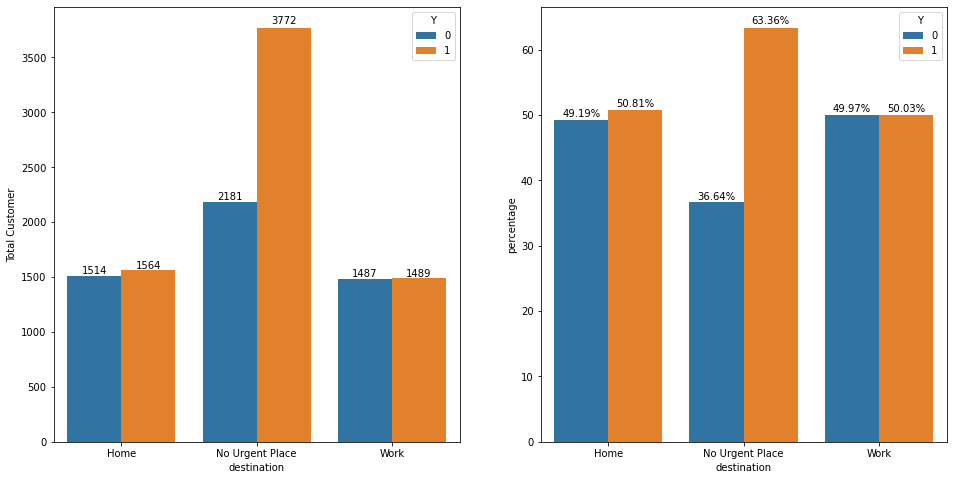

In [ ]:
plot_box('destination')

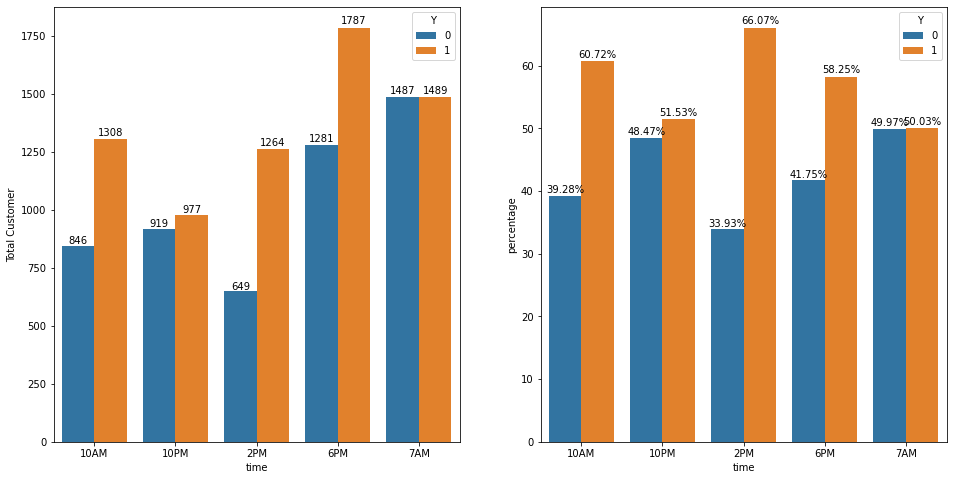

In [ ]:
plot_box('time')

In [ ]:
df_cat['time'].mode()

0    6PM
dtype: object

In [ ]:
 ndf = df_cat.groupby(['destination', 'time','Y']).agg({'id':'count'}).reset_index()
ndf

,destination,time,Y,id
0,Home,10PM,0,586
1,Home,10PM,1,472
2,Home,6PM,0,928
3,Home,6PM,1,1092
4,No Urgent Place,10AM,0,846
5,No Urgent Place,10AM,1,1308
6,No Urgent Place,10PM,0,333
7,No Urgent Place,10PM,1,505
8,No Urgent Place,2PM,0,649
9,No Urgent Place,2PM,1,1264


In [ ]:
def cr(vc):
    return vc[1] / (vc[0] + vc[1]) * 100

In [ ]:
cr(df_cat[df_cat['expiration'] == '2h']['Y'].value_counts())

49.5004712535344

In [ ]:
cr(df_cat[df_cat['expiration'] == '2h']['Y'].value_counts())

49.5004712535344

gimana cara tau pas 2h itu Y1 tinggi dimana biar bisa tau impulsif buying dimana, sama kalo coffeehouse selain 1-3 itu biasanya banyak dimana belinya...

In [ ]:
cf =df_cat[(df_cat['CoffeeHouse']=='never') & (df_cat['Y'] == 1)]
coupon = cf.groupby(['coupon'])['Y'].count()
print('tabel of coupon:\n',coupon)


tabel of coupon:
 coupon
Bar                      160
Carry out & Take away    404
Coffee House             157
Restaurant(20-50)        140
Restaurant(<20)          423
Name: Y, dtype: int64


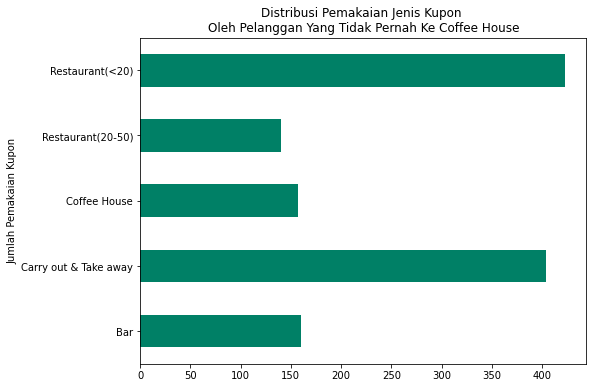

In [ ]:
ax = coupon.plot(kind='barh',xlabel='Jenis Kupon',use_index=True,figsize=(8,6), colormap='summer', fontsize=10)
ax.set_alpha(0.8)
ax.set_title('Distribusi Pemakaian Jenis Kupon \nOleh Pelanggan Yang Tidak Pernah Ke Coffee House')
ax.set_ylabel('Jumlah Pemakaian Kupon')
plt.show()

In [ ]:
cf

,id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
171,193,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21-30,...,$100000 or More,less1,never,gt8,1~3,less1,0,0,0,1
174,196,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21-30,...,$100000 or More,less1,never,gt8,1~3,less1,1,0,0,1
178,200,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21-30,...,$100000 or More,less1,never,gt8,1~3,less1,1,0,0,1
180,202,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21-30,...,$100000 or More,less1,never,gt8,1~3,less1,1,0,0,1
182,204,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21-30,...,$100000 or More,less1,never,gt8,1~3,less1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,12671,No Urgent Place,Partner,Snowy,30,10AM,Restaurant(<20),1d,Male,21-30,...,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,0,1
11999,12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,21-30,...,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,1,1
12000,12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,21-30,...,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,1
12002,12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,21-30,...,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,1,1


tabel of carryaway:
 CarryAway
1~3      461
4~8      423
gt8       88
less1    263
never     49
Name: Y, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


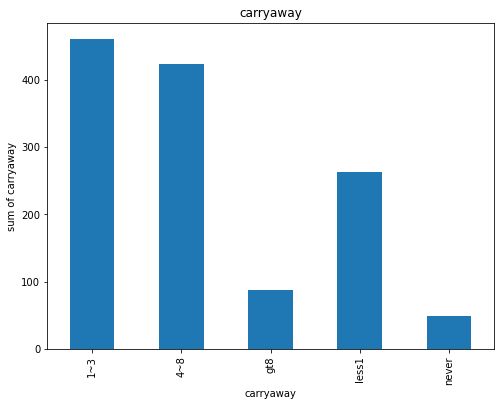

In [ ]:
carryaway = cf.groupby(['CarryAway'])['Y'].count()
print('tabel of carryaway:\n',carryaway)
print(carryaway.plot(kind='bar',title='carryaway',ylabel='sum of carryaway',xlabel='carryaway',figsize=(8,6)))

tabel of Restaurant less than 20 dollar:
 RestaurantLessThan20
1~3      472
4~8      325
gt8       88
less1    335
never     64
Name: Y, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


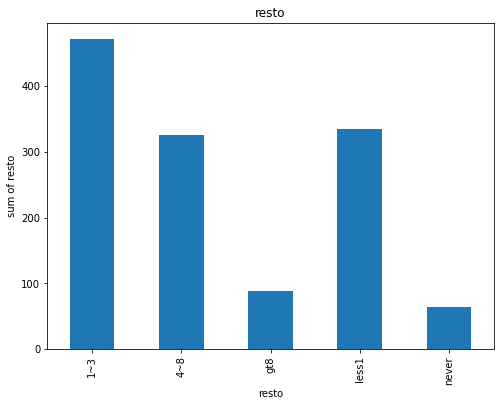

In [ ]:
restoless20= cf.groupby(['RestaurantLessThan20'])['Y'].count()
print('tabel of Restaurant less than 20 dollar:\n',restoless20)
print(restoless20.plot(kind='bar',title='resto',ylabel='sum of resto',xlabel='resto',figsize=(8,6)))

In [ ]:
cf.groupby(['Bar'])['Y'].count()

Bar
1~3      224
4~8       66
gt8       25
less1    272
never    697
Name: Y, dtype: int64

In [ ]:
for kolom in cf:
    print(f'''Value count column {kolom}:''')
    print(cf[kolom].value_counts())
    print()

Value count column id:
193      1
8093     1
8560     1
8559     1
8552     1
        ..
4366     1
4365     1
4362     1
4361     1
12680    1
Name: id, Length: 1284, dtype: int64

Value count column destination:
No Urgent Place    679
Home               318
Work               287
Name: destination, dtype: int64

Value count column passanger:
Alone        698
Friend(s)    393
Partner      115
Kid(s)        78
Name: passanger, dtype: int64

Value count column weather:
Sunny    1052
Snowy     122
Rainy     110
Name: weather, dtype: int64

Value count column temperature:
80    683
55    352
30    249
Name: temperature, dtype: int64

Value count column time:
6PM     345
7AM     287
10PM    229
10AM    213
2PM     210
Name: time, dtype: int64

Value count column coupon:
Restaurant(<20)          423
Carry out & Take away    404
Bar                      160
Coffee House             157
Restaurant(20-50)        140
Name: coupon, dtype: int64

Value count column expiration:
1d    835
2h    449

In [ ]:
Y1 = df_cat[df_cat['Y']==1]
Y1.groupby(['expiration','Y','time']).agg({'id':'count'}).reset_index()

,expiration,Y,time,id
0,1d,1,10AM,595
1,1d,1,10PM,647
2,1d,1,2PM,885
3,1d,1,6PM,1024
4,1d,1,7AM,1048
5,2h,1,10AM,713
6,2h,1,10PM,330
7,2h,1,2PM,379
8,2h,1,6PM,763
9,2h,1,7AM,441


Coffe house 1-3 bisa diberikan kupon terkait, sedangkan untuk kelas lainnya bisa diberikan rekomendasi kupon CarryAway dan restoran kurang dari 20 dollar.
Expiration 2h bisa diberikan pada saat jam 10 pagi.

In [ ]:
cb = Y1[(Y1['expiration']=='2h') & (Y1['time']=='10AM')]
cb

,id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
23,45,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,41-50,...,$12500 - $24999,never,4~8,1~3,1~3,never,0,0,0,1
25,47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,41-50,...,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,1
34,56,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,41-50,...,$12500 - $24999,never,4~8,1~3,1~3,never,0,0,0,1
45,67,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,41-50,...,$75000 - $87499,less1,1~3,1~3,1~3,less1,0,0,0,1
46,68,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,41-50,...,$75000 - $87499,less1,1~3,1~3,1~3,less1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11938,12615,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Female,21-30,...,$37500 - $49999,never,4~8,1~3,1~3,less1,0,0,0,1
11968,12645,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Male,31-40,...,$100000 or More,less1,never,4~8,gt8,less1,0,0,0,1
11971,12648,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,31-40,...,$100000 or More,less1,never,4~8,gt8,less1,0,0,0,1
11988,12665,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Male,21-30,...,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,0,1


tabel of Y rate in exp 2h:
 expiration  time
1d          10AM     595
            10PM     647
            2PM      885
            6PM     1024
            7AM     1048
2h          10AM     713
            10PM     330
            2PM      379
            6PM      763
            7AM      441
Name: Y, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


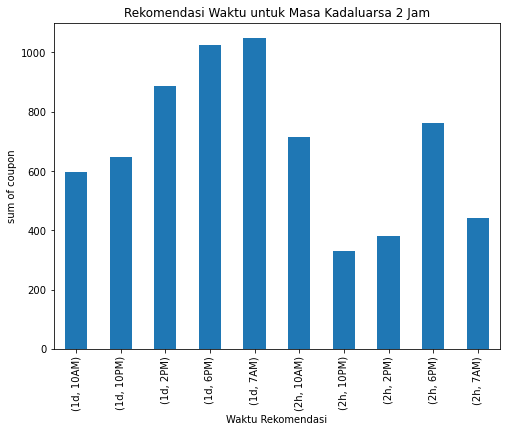

In [ ]:
exp2h = Y1.groupby(['time'])['Y'].count()
print('tabel of Y rate in exp 2h:\n',exp2h)
print(exp2h.plot(kind='bar',title='Rekomendasi Waktu untuk Masa Kadaluarsa 2 Jam',ylabel='sum of coupon',xlabel='Waktu Rekomendasi',figsize=(8,6)))

tabel of coupon:
 coupon
Bar                        9
Carry out & Take away    230
Coffee House             334
Restaurant(20-50)         21
Restaurant(<20)          119
Name: Y, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


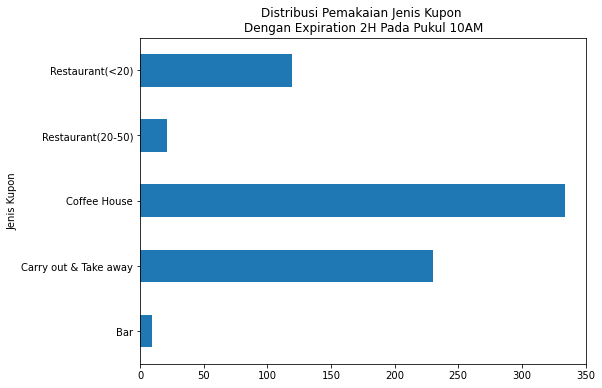

In [ ]:
coupon2h = cb.groupby(['coupon'])['Y'].count()
print('tabel of coupon:\n',coupon2h)
print(coupon2h.plot(kind='barh',title='Distribusi Pemakaian Jenis Kupon \nDengan Expiration 2H Pada Pukul 10AM',ylabel='sum of coupon',xlabel='Jenis Kupon',figsize=(8,6)))

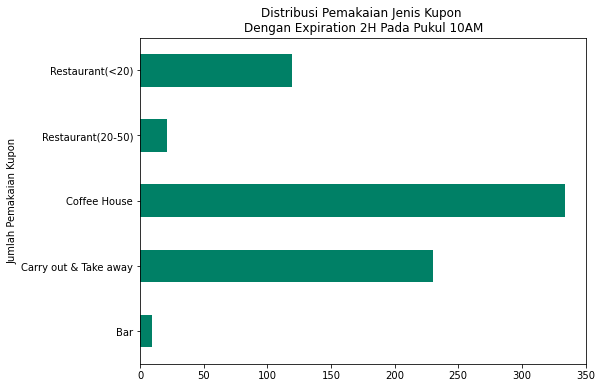

In [ ]:
ax1 = coupon2h.plot(kind='barh',xlabel='Jenis Kupon',use_index=True,figsize=(8,6), colormap='summer', fontsize=10)
ax.set_alpha(0.8)
ax1.set_title('Distribusi Pemakaian Jenis Kupon \nDengan Expiration 2H Pada Pukul 10AM')
ax1.set_ylabel('Jumlah Pemakaian Kupon')
plt.show()

In [ ]:
for kolom in cb:
    print(f'''Value count column {kolom}:''')
    print(cb[kolom].value_counts())
    print()

Value count column id:
45       1
6237     1
5676     1
5698     1
5720     1
        ..
2272     1
2274     1
2294     1
2300     1
12668    1
Name: id, Length: 713, dtype: int64

Value count column destination:
No Urgent Place    713
Name: destination, dtype: int64

Value count column passanger:
Friend(s)    381
Alone        148
Partner      101
Kid(s)        83
Name: passanger, dtype: int64

Value count column weather:
Sunny    692
Rainy     21
Name: weather, dtype: int64

Value count column temperature:
80    566
55     90
30     57
Name: temperature, dtype: int64

Value count column time:
10AM    713
Name: time, dtype: int64

Value count column coupon:
Coffee House             334
Carry out & Take away    230
Restaurant(<20)          119
Restaurant(20-50)         21
Bar                        9
Name: coupon, dtype: int64

Value count column expiration:
2h    713
Name: expiration, dtype: int64

Value count column gender:
Female    369
Male      344
Name: gender, dtype: int64

Value